# **LEVEL 2 PROJECT 1**
HOUSING DATASET

***KEY INSIGHT CHALLANGES:-***

---

---



---




**Data Collection:** Obtain a dataset with numerical features and a target variable for prediction.

---


**Data Exploration and Cleaning:** Explore the dataset to understand its structure, handle missing values, and ensure data quality.

---


**Feature Selection:** Identify relevant features that may contribute to the predictive model.

---


**Model Training:** Implement linear regression using a machine learning library (e.g., Scikit-
Learn).

---


**Model Evaluation:** Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.

---


**Visualization:**Create visualizations to illustrate the relationship between the predicted and
actual values.

---






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/dataset/Housing.csv")  # Update the path if needed

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# **1. DATA CLEANING**

In [ ]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


**Let's find null value**

---



In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


# 2. Let's covert categorical column into numerical column

---



In [ ]:
categorical_col = ["mainroad", "guestroom", "basement", "hotwaterheating",
                    "airconditioning", "prefarea", "furnishingstatus"]
encoder = LabelEncoder()
for col in categorical_col:
    df[col] = encoder.fit_transform(df[col])


**Display is covert or not**

In [ ]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


# **3. Feature Selection <> CORRELATION ANALYSIS**

---



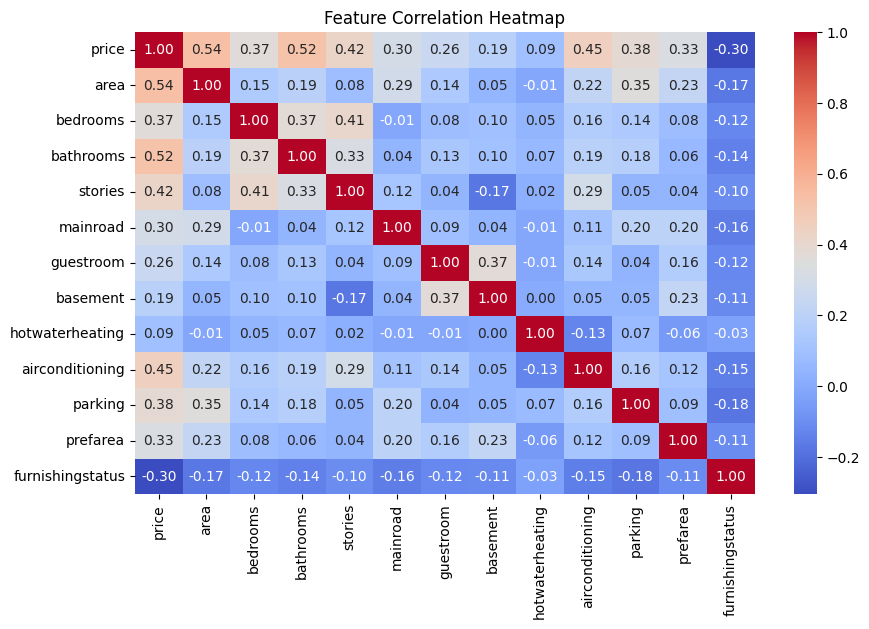

In [ ]:
# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **4. Model Training <> LINEAR REGRESSION**

---



In [ ]:
# Define features (X) and target variable (y)
X = df.drop(columns=["price"])
y = df["price"]

In [ ]:
# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# **5. MODEL EVALUATION**

---



In [ ]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display results using pandas DataFrame
evaluation_df = pd.DataFrame({"Metric": ["Mean Squared Error", "R-squared"],
                              "Value": [mse, r2]})


In [ ]:
print(evaluation_df)

               Metric         Value
0  Mean Squared Error  1.771751e+12
1           R-squared  6.494754e-01


**Result**

* Mean Squared Error (MSE): 1,771,751,116,594.03

* R² Score: 0.65 (indicating the model explains about 65% of the variance in house prices)  



# **6. VISUALIZATIONS**

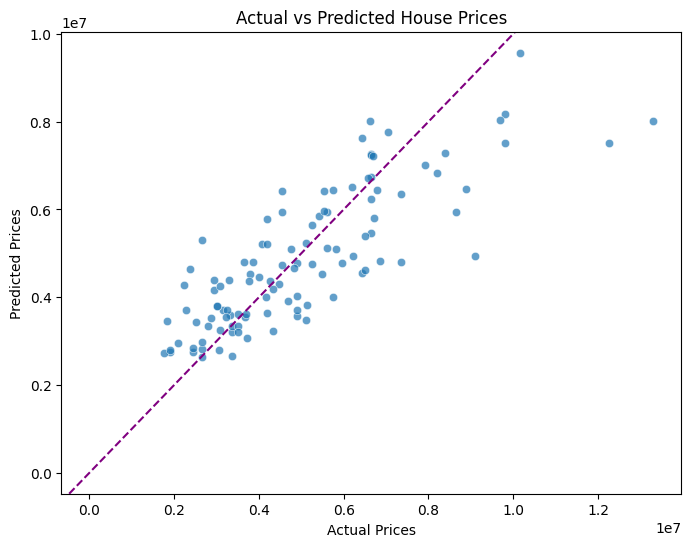

In [ ]:
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.axline([0, 0], [1, 1], color="purple", linestyle="--")  # 45-degree reference line
plt.show()

***It shows the relationship between actual and predicted house prices. Ideally, all points should be close to the red 45-degree line, which represents perfect predictions. While our model performs reasonably well, there is some spread, indicating room for improvement.***

---



**RESULT**

---



*   The model's MSE and R² scores are printed using pandas.

*   The scatter plot helps visualize prediction accuracy.

---



